In [1]:
import json
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [2]:
json_schema = {
    "title" : "Person",
    "description": "Identifying information about a person.",
    "type": "object",
    "properties": {
        "name" : {"title": "Name", "description": "The person's name", "type": "string"},
        "age": {"title": "Age", "description": "The person's age", "type": "integer"},
        "occupation": {
            "title": "Occupation",
            "description": "The person's Occupation",
            "type": "string",
        },
    },
    "required": ["name", "age"],
}

In [3]:
llm = ChatOllama(model="gemma2")

C:\Users\human-13\AppData\Local\Temp\ipykernel_1788\3255660932.py:1: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model="gemma2")


In [4]:
messages = [
    HumanMessage(
        content = "Please tell me about a person using the following JSON schema:"
    ),
    HumanMessage(content="{dumps}"),
    HumanMessage(
        content="""Now, considering the schema, please describe following person:
        Her name is Eun-Chae Lee, she is 25 years old, and she is a software engineer.
        """
    ),
]

In [5]:
prompt = ChatPromptTemplate.from_messages(
    messages
)

In [6]:
dumps = json.dumps(json_schema, indent=2)

In [7]:
chain = (
    prompt | llm | StrOutputParser()
)

In [8]:
chain.invoke({"dumps": dumps})

'Let\'s break down how we can represent Eun-Chae Lee using that JSON schema. \n\n**Understanding the Schema:**\n\nThe provided schema defines the structure of information we can store about a person. It tells us:\n\n* **Required Fields:** `name`, `age`, `occupation` are mandatory pieces of information.\n* **Data Types:**\n    * `name`: A string representing the person\'s full name.\n    * `age`: A number representing the person\'s age in years.\n    * `occupation`: A string describing the person\'s job or profession.\n\n**Representing Eun-Chae Lee:**\n\nGiven the schema, we can represent Eun-Chae Lee as follows:\n\n```json\n{\n  "name": "Eun-Chae Lee",\n  "age": 25,\n  "occupation": "Software Engineer"\n}\n```\n\n\n**Description:**\n\nThis JSON object accurately reflects the information about Eun-Chae Lee based on the schema. \n\n* Her name is "Eun-Chae Lee."\n* She is 25 years old.\n* Her occupation is "Software Engineer." \n\n\n\nLet me know if you\'d like to explore how this schema 

In [20]:
import base64
from io import BytesIO
from IPython.display import HTML, display
from PIL import Image

In [21]:
def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

In [22]:
def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))

In [23]:
file_path = "./imgs/sample01.webp"
pil_image = Image.open(file_path)
pil_image = pil_image.resize((256, 256))


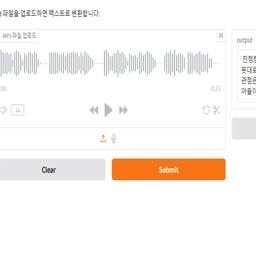

In [24]:
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [25]:
from langchain_core.output_parsers import StrOutputParser
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

In [26]:
llm = ChatOllama(model="llava:7b", temperature=0)

In [27]:
def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.

In [28]:
chain = prompt_func | llm | StrOutputParser()

In [29]:
query_chain = chain.invoke(
    {"text": "Describe a picture in bullet points.", "image": image_b64}
)
query_chain

' - The image shows a screenshot of a smartphone interface with a music player application open.\n- The app is displaying a song with the title "밝은 아침" by an artist named "빅스타일".\n- There are two options visible on the screen: "Clear" and "Submit".\n- The "Clear" button is highlighted, suggesting it\'s currently selected.\n- The interface includes a playback bar at the bottom of the screen with a progress indicator showing that the song has been played for 1 minute and 20 seconds.\n- There are Korean characters on the screen, indicating that the user interface is in Korean.\n- The overall style of the image is digital and modern, typical of smartphone applications. '